# EDA of Sales prediction Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('Future_sales_train.csv')

In [4]:
train.head(10)

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,PROD_3,SLSMAN_1,10,2019,80,0
1,PROD_3,SLSMAN_1,11,2019,80,0
2,PROD_3,SLSMAN_1,12,2019,40,0
3,PROD_5,SLSMAN_1,10,2019,160,211
4,PROD_5,SLSMAN_1,11,2019,160,173
5,PROD_5,SLSMAN_1,12,2019,240,175
6,PROD_8,SLSMAN_1,10,2019,0,7
7,PROD_10,SLSMAN_1,10,2019,0,82
8,PROD_10,SLSMAN_1,11,2019,0,79
9,PROD_10,SLSMAN_1,12,2019,0,59


In [5]:
train.shape

(22469, 6)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22469 entries, 0 to 22468
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PROD_CD       22469 non-null  object
 1   SLSMAN_CD     22469 non-null  object
 2   PLAN_MONTH    22469 non-null  int64 
 3   PLAN_YEAR     22469 non-null  int64 
 4   TARGET_IN_EA  22469 non-null  object
 5   ACH_IN_EA     22469 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


In [7]:
train.describe()

,PLAN_MONTH,PLAN_YEAR
count,22469.000000,22469.0
mean,11.039744,2019.0
std,0.800889,0.0
min,10.000000,2019.0
25%,10.000000,2019.0
50%,11.000000,2019.0
75%,12.000000,2019.0
max,12.000000,2019.0


In [8]:
print("we are dealing with ",len(train), "rows")
print("we are dealing with",len(train['PROD_CD'].unique()),"products")
print("we are dealing with",len(train['SLSMAN_CD'].unique()),"Salesman")

we are dealing with  22469 rows
we are dealing with 86 products
we are dealing with 224 Salesman


In [9]:
train.isnull().sum()

PROD_CD         0
SLSMAN_CD       0
PLAN_MONTH      0
PLAN_YEAR       0
TARGET_IN_EA    0
ACH_IN_EA       0
dtype: int64

# Float value to integer

In [10]:
train['TARGET_IN_EA']= train['TARGET_IN_EA'].str.replace(',','').astype(int)

In [11]:
train['ACH_IN_EA']= train['ACH_IN_EA'].str.replace(',','').astype(int)

# Checking Normality distribution

<AxesSubplot:ylabel='Frequency'>

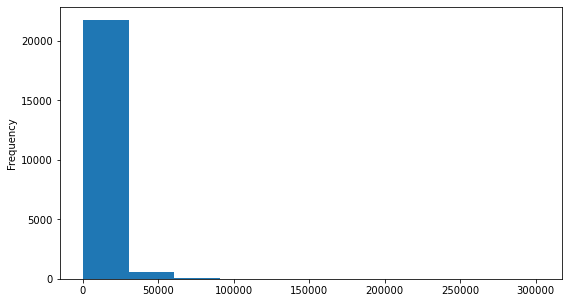

In [12]:
plt.figure(figsize = (9, 5)) 
train['TARGET_IN_EA'].plot(kind ="hist") 

<AxesSubplot:ylabel='Frequency'>

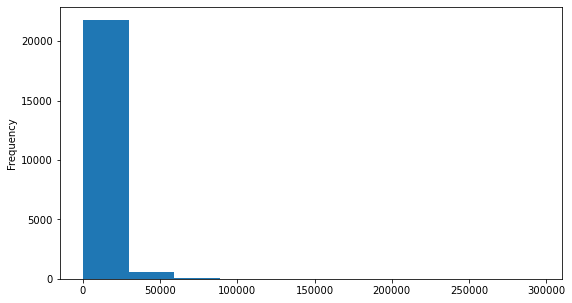

In [13]:
plt.figure(figsize = (9, 5)) 
train['ACH_IN_EA'].plot(kind ="hist") 

# Box plot

<AxesSubplot:>

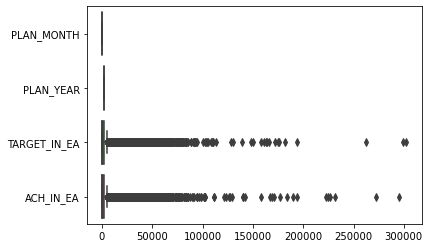

In [14]:
sns.boxplot(data=train,orient="h")

# Target Achieved frequency distribution

In [15]:
train['comparison'] = np.where(train['TARGET_IN_EA'] <= train['ACH_IN_EA'], True, False)
train['comparison'].value_counts()

True     11702
False    10767
Name: comparison, dtype: int64

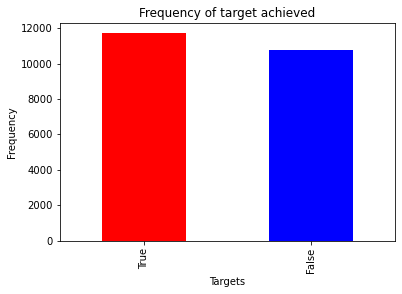

In [16]:
ax = train['comparison'].value_counts().plot(kind='bar',title="Frequency of target achieved",color=['r','b'])
ax.set_xlabel("Targets")
ax.set_ylabel("Frequency")
plt.show()

In [17]:
groupdata1 = train[['SLSMAN_CD','PROD_CD']]
group1 = groupdata1.groupby('SLSMAN_CD')
group1.head()

groupunique1 = group1.apply(lambda x: x['PROD_CD'].unique())
groupunique1
# For particular products
print("Salesman1 produts:\n", groupunique1.SLSMAN_1)
print("Salesman2 produts:\n", groupunique1.SLSMAN_2)

Salesman1 produts:
 ['PROD_3' 'PROD_5' 'PROD_8' 'PROD_10' 'PROD_11' 'PROD_13' 'PROD_14'
 'PROD_15' 'PROD_16' 'PROD_17' 'PROD_18' 'PROD_19' 'PROD_21' 'PROD_22'
 'PROD_23' 'PROD_25' 'PROD_26' 'PROD_27' 'PROD_31' 'PROD_32' 'PROD_33'
 'PROD_35' 'PROD_36' 'PROD_37' 'PROD_38' 'PROD_39' 'PROD_42' 'PROD_43'
 'PROD_45' 'PROD_47' 'PROD_48' 'PROD_50' 'PROD_51' 'PROD_56' 'PROD_58'
 'PROD_59' 'PROD_61' 'PROD_62' 'PROD_66' 'PROD_74' 'PROD_76' 'PROD_80'
 'PROD_81' 'PROD_82' 'PROD_83' 'PROD_84' 'PROD_85' 'PROD_86']
Salesman2 produts:
 ['PROD_3' 'PROD_5' 'PROD_10' 'PROD_11' 'PROD_13' 'PROD_14' 'PROD_15'
 'PROD_16' 'PROD_17' 'PROD_18' 'PROD_19' 'PROD_22' 'PROD_23' 'PROD_25'
 'PROD_26' 'PROD_27' 'PROD_31' 'PROD_32' 'PROD_33' 'PROD_35' 'PROD_36'
 'PROD_37' 'PROD_38' 'PROD_39' 'PROD_42' 'PROD_43' 'PROD_45' 'PROD_47'
 'PROD_49' 'PROD_50' 'PROD_51' 'PROD_56' 'PROD_58' 'PROD_59' 'PROD_61'
 'PROD_62' 'PROD_74' 'PROD_76' 'PROD_80' 'PROD_81' 'PROD_82' 'PROD_83'
 'PROD_84' 'PROD_85' 'PROD_86']


In [18]:
groupdata2 = train[['SLSMAN_CD','PROD_CD']]
group2 = groupdata2.groupby('PROD_CD')
group2.head()

groupunique2 = group2.apply(lambda x: x['SLSMAN_CD'].unique())
groupunique2

# For particular products
print("Produt1 Salesman are:\n", groupunique2.PROD_1)
print("Produt2 Salesman are:\n", groupunique2.PROD_2)


Produt1 Salesman are:
 ['SLSMAN_130' 'SLSMAN_188' 'SLSMAN_189' 'SLSMAN_223' 'SLSMAN_224']
Produt2 Salesman are:
 ['SLSMAN_13' 'SLSMAN_14' 'SLSMAN_16' 'SLSMAN_41' 'SLSMAN_42' 'SLSMAN_52'
 'SLSMAN_54' 'SLSMAN_58' 'SLSMAN_60' 'SLSMAN_62' 'SLSMAN_63' 'SLSMAN_92'
 'SLSMAN_94' 'SLSMAN_99' 'SLSMAN_103' 'SLSMAN_107' 'SLSMAN_115'
 'SLSMAN_117' 'SLSMAN_124' 'SLSMAN_127' 'SLSMAN_128' 'SLSMAN_142'
 'SLSMAN_143' 'SLSMAN_146' 'SLSMAN_148' 'SLSMAN_163' 'SLSMAN_164'
 'SLSMAN_166' 'SLSMAN_170' 'SLSMAN_180' 'SLSMAN_183' 'SLSMAN_184'
 'SLSMAN_191' 'SLSMAN_194' 'SLSMAN_197' 'SLSMAN_198' 'SLSMAN_211']


In [19]:
train = train.drop(['comparison'],axis=1)
train.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,PROD_3,SLSMAN_1,10,2019,80,0
1,PROD_3,SLSMAN_1,11,2019,80,0
2,PROD_3,SLSMAN_1,12,2019,40,0
3,PROD_5,SLSMAN_1,10,2019,160,211
4,PROD_5,SLSMAN_1,11,2019,160,173


# Categorical to numnerical transformation

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['PROD_CD'] = label_encoder.fit_transform(train['PROD_CD'])
train['SLSMAN_CD'] = label_encoder.fit_transform(train['SLSMAN_CD'])
train.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,22,0,10,2019,80,0
1,22,0,11,2019,80,0
2,22,0,12,2019,40,0
3,44,0,10,2019,160,211
4,44,0,11,2019,160,173


In [21]:
train['SLSMAN_CD'].value_counts()

184    157
43     151
100    142
179    141
223    140
      ... 
116     15
199      7
176      5
75       2
200      2
Name: SLSMAN_CD, Length: 224, dtype: int64

In [22]:
train['PROD_CD'].value_counts()

45    590
41    582
54    572
6     569
5     568
     ... 
21      2
69      1
43      1
61      1
16      1
Name: PROD_CD, Length: 86, dtype: int64

In [24]:
train.describe()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
count,22469.000000,22469.000000,22469.000000,22469.0,22469.000000,22469.000000
mean,34.109529,109.290578,11.039744,2019.0,3790.074058,3714.193244
std,23.665013,66.624366,0.800889,0.0,10792.649817,10608.964868
min,0.000000,0.000000,10.000000,2019.0,0.000000,0.000000
25%,14.000000,49.000000,10.000000,2019.0,12.000000,70.000000
50%,30.000000,105.000000,11.000000,2019.0,252.000000,323.000000
75%,51.000000,167.000000,12.000000,2019.0,2208.000000,2124.000000
max,85.000000,223.000000,12.000000,2019.0,302400.000000,295578.000000


# Visualization

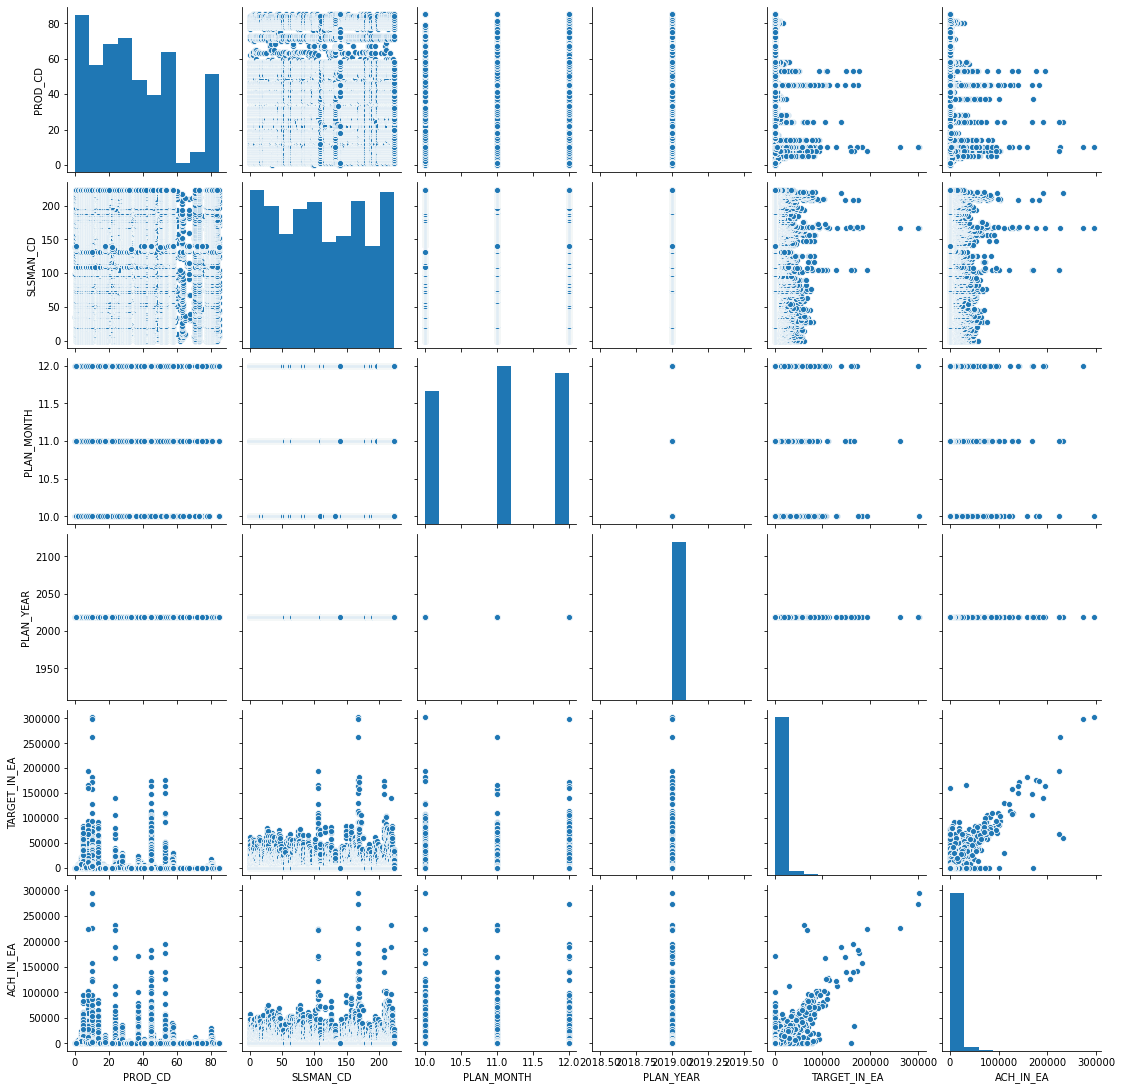

In [26]:
sns.pairplot(train) ### We can see some colinearity in between 'target_in_ea' & 'ach_in_ea'

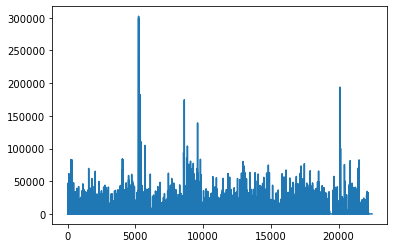

In [27]:
plt.plot(train['TARGET_IN_EA'])

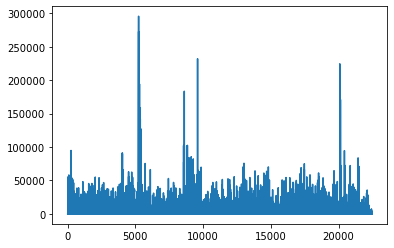

In [28]:
plt.plot(train['ACH_IN_EA'])

<AxesSubplot:xlabel='PLAN_MONTH', ylabel='TARGET_IN_EA'>

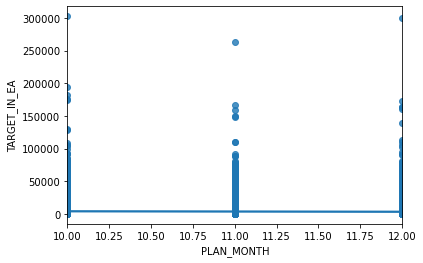

In [30]:
sns.regplot(x=train['PLAN_MONTH'],y=train['TARGET_IN_EA'])

<AxesSubplot:xlabel='PLAN_MONTH', ylabel='ACH_IN_EA'>

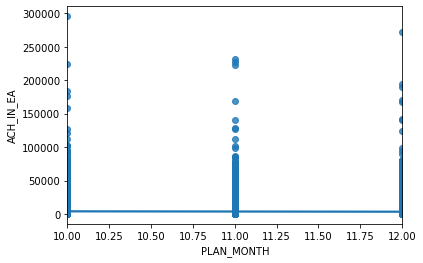

In [31]:
sns.regplot(x=train['PLAN_MONTH'],y=train['ACH_IN_EA'])

In [32]:
train.groupby('PLAN_MONTH')['TARGET_IN_EA'].mean()

PLAN_MONTH
10    4491.333924
11    3284.776365
12    3698.947588
Name: TARGET_IN_EA, dtype: float64

<AxesSubplot:xlabel='PLAN_MONTH'>

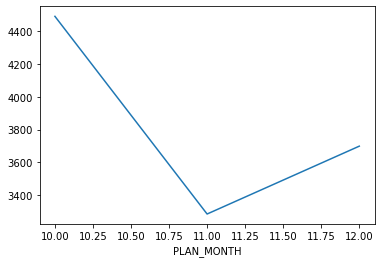

In [33]:
train.groupby('PLAN_MONTH')['TARGET_IN_EA'].mean().plot()

In [34]:
train.groupby('PLAN_MONTH')['ACH_IN_EA'].mean()

PLAN_MONTH
10    4172.458167
11    3465.212914
12    3569.689831
Name: ACH_IN_EA, dtype: float64

<AxesSubplot:xlabel='PLAN_MONTH'>

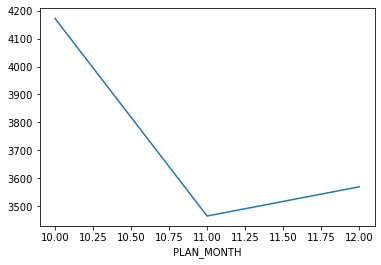

In [35]:
train.groupby('PLAN_MONTH')['ACH_IN_EA'].mean().plot()

<AxesSubplot:xlabel='PROD_CD', ylabel='TARGET_IN_EA'>

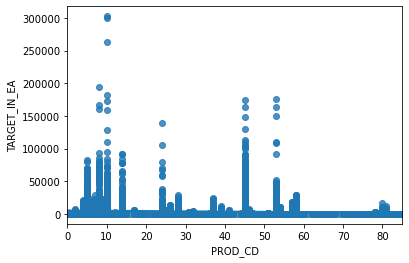

In [36]:
sns.regplot(x=train['PROD_CD'],y=train['TARGET_IN_EA'])

<AxesSubplot:xlabel='PROD_CD', ylabel='ACH_IN_EA'>

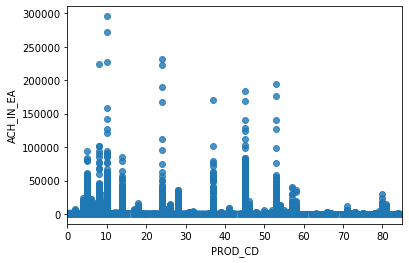

In [37]:
sns.regplot(x=train['PROD_CD'],y=train['ACH_IN_EA'])

<AxesSubplot:xlabel='PROD_CD'>

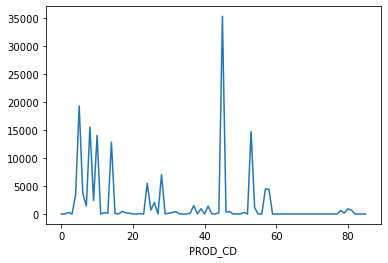

In [38]:
train.groupby('PROD_CD')['TARGET_IN_EA'].mean().plot()

<AxesSubplot:xlabel='PROD_CD'>

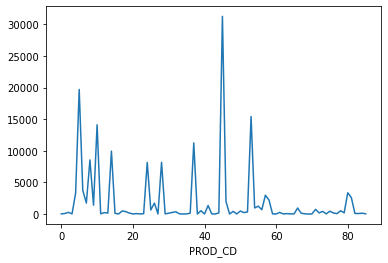

In [39]:
train.groupby('PROD_CD')['ACH_IN_EA'].mean().plot()

<AxesSubplot:xlabel='SLSMAN_CD'>

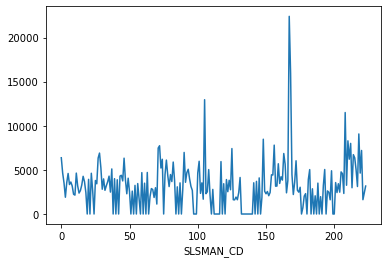

In [40]:
train.groupby('SLSMAN_CD')['TARGET_IN_EA'].mean().plot()

<AxesSubplot:xlabel='SLSMAN_CD'>

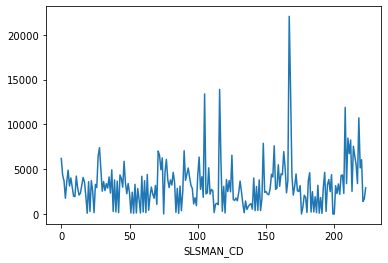

In [41]:
train.groupby('SLSMAN_CD')['ACH_IN_EA'].mean().plot()

<AxesSubplot:title={'center':'Target distribution'}, ylabel='Density'>

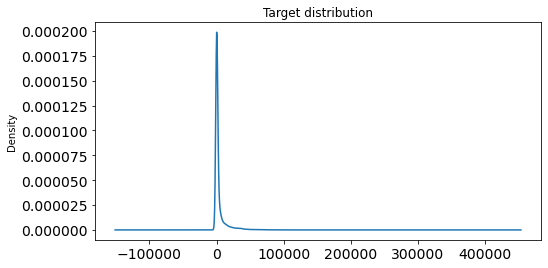

In [42]:
train['TARGET_IN_EA'].plot(kind='density',title='Target distribution',fontsize=14,figsize=(8,4))

<AxesSubplot:title={'center':'Log Target Distribution'}, ylabel='Density'>

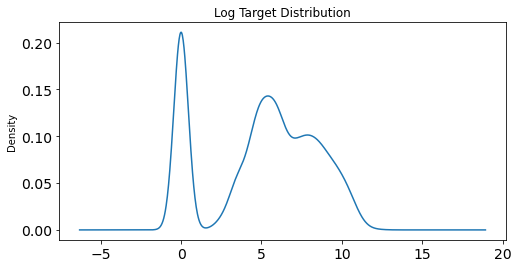

In [43]:
#### Seems like a normal distribution, we need a better visualization of this ####
pd.Series(np.log1p(train['TARGET_IN_EA'])).plot(kind = 'density', title = 'Log Target Distribution', fontsize=14, figsize=(8,4))

<AxesSubplot:title={'center':'Target distribution'}, ylabel='Density'>

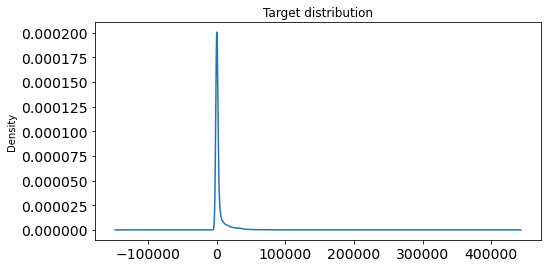

In [44]:
train['ACH_IN_EA'].plot(kind='density',title='Target distribution',fontsize=14,figsize=(8,4))

<AxesSubplot:title={'center':'Log Target Distribution'}, ylabel='Density'>

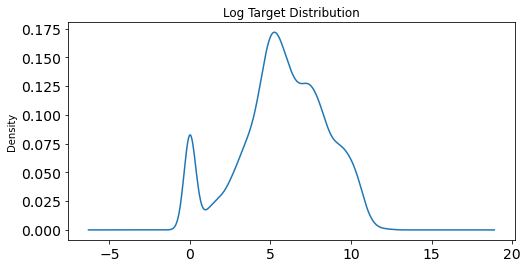

In [45]:
pd.Series(np.log1p(train['ACH_IN_EA'])).plot(kind = 'density', title = 'Log Target Distribution', fontsize=14, figsize=(8,4))

In [46]:
train.nunique()

PROD_CD           86
SLSMAN_CD        224
PLAN_MONTH         3
PLAN_YEAR          1
TARGET_IN_EA    2020
ACH_IN_EA       6638
dtype: int64

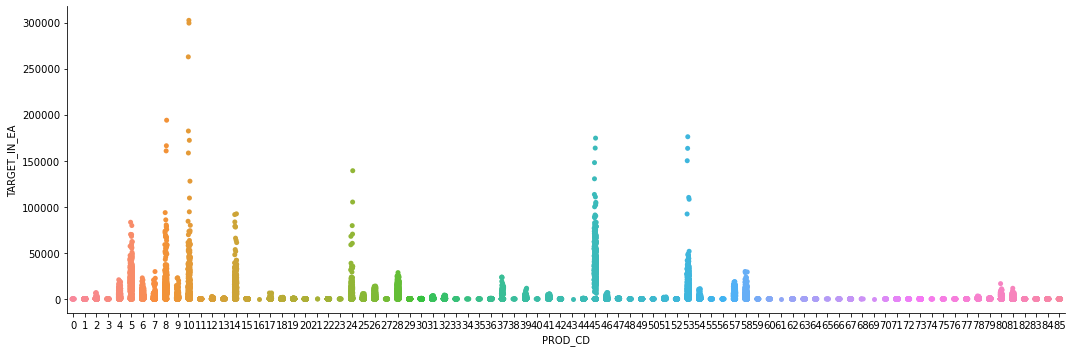

In [47]:
#### Cat plotting 
#### Target distribution per category 

sns.catplot(x='PROD_CD',y='TARGET_IN_EA',data=train,height=5,aspect=18/6)

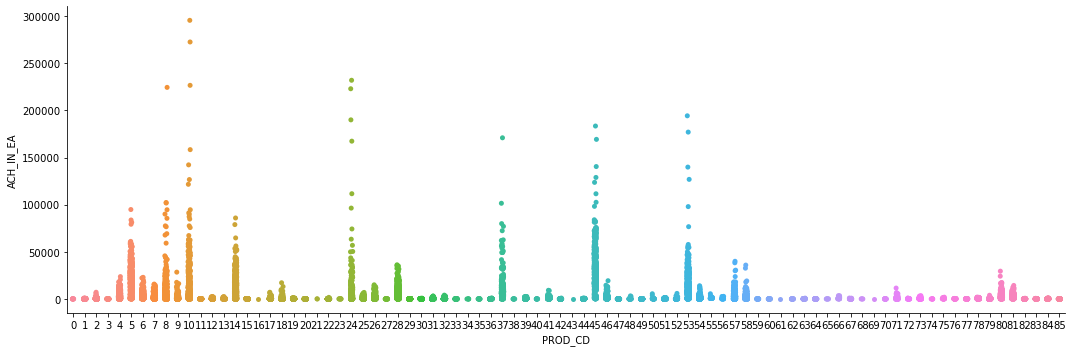

In [48]:
sns.catplot(x='PROD_CD',y='ACH_IN_EA',data=train,height=5,aspect=18/6)

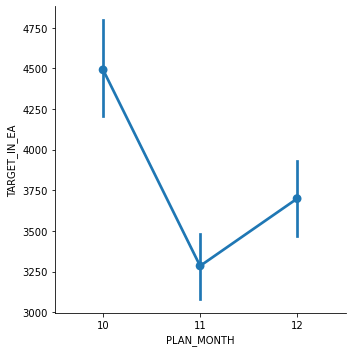

In [49]:
sns.factorplot(data = train, x ="PLAN_MONTH", y = "TARGET_IN_EA")

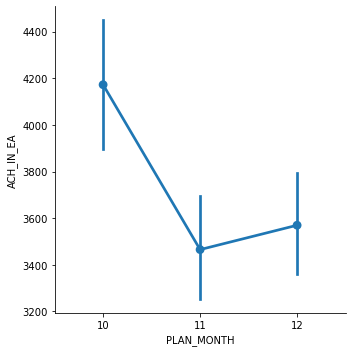

In [50]:
sns.factorplot(data = train, x ="PLAN_MONTH", y = "ACH_IN_EA")

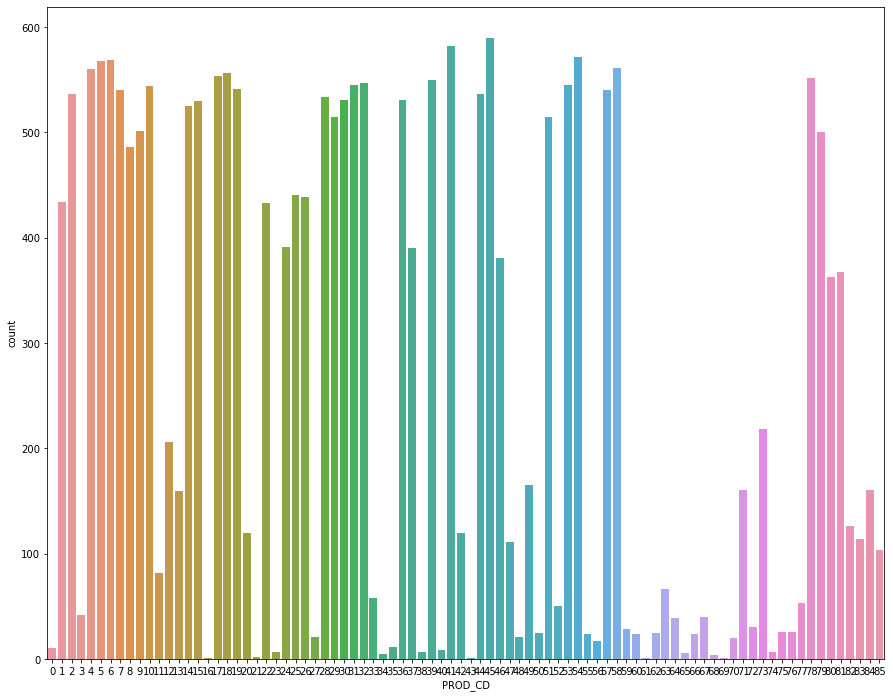

In [51]:
plt.figure(figsize=(15,12))
sns.countplot(x='PROD_CD',data= train)
plt.show()

<AxesSubplot:>

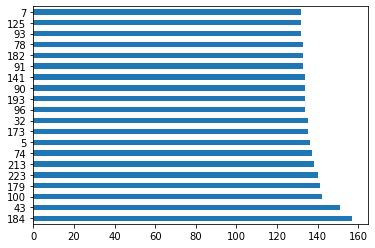

In [52]:
train['SLSMAN_CD'].value_counts()[:20].plot(kind='barh') ### 'SLSMAN_CD'-138,186 & 103 having highest frequency.

# Satatistical Test of features

In [53]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(train['TARGET_IN_EA'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.375, p=0.000
Sample does not look Gaussian (reject H0)


In [54]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(train['ACH_IN_EA'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.365, p=0.000
Sample does not look Gaussian (reject H0)
